# **Initializing And Loading Data**
https://www.kaggle.com/datasets/quora/question-pairs-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tqdm import tqdm
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
DUMP_PATH = "/content/drive/MyDrive/Colab Notebooks/dumps/quora_question_pairs/"
NOTEBOOK_NAME = "ml-04-6"
TEST_SIZE = 0.2
SAMPLE_SIZE = 200_000
RATIO = [1.2, 1]
RANDOM_STATE = 42

os.listdir(DUMP_PATH)

['more_preprocessed_data_298550.csv',
 'less_nosw_preprocessed_298550.csv',
 'dl-25-3_emb_weights_gensim.npy',
 'back1',
 'dl-25-6_tokenizer.json',
 'dl-25-6_summary.png',
 'dl-25-6_graph_A0.762_E8_B32.png',
 'dl-25-6_model_A0.762_E8_B32.h5',
 'final_preprocessed_data_allowStopwords1.csv',
 'final_preprocessed_data_allowStopwords0.csv',
 'ml-02-1_word_embeddings.json',
 'dl-02-1_tokenizer.json',
 'dl-02-1_graph_A0.757_E8_B32.png',
 'dl-02-1_model.h5',
 'dl-02-1_summary.png',
 'dl-02-2_tokenizer.json',
 'dl-02-2_summary.png',
 'ml-04-2_pipe.pkl',
 'ml-04-3_pipe.pkl',
 'ml-04-4_pipe.pkl',
 'ml-04-5_pipe.pkl']

In [ ]:
df0 = pd.read_csv(os.path.join(DUMP_PATH, 'final_preprocessed_data_allowStopwords0.csv'))
df1 = pd.read_csv(os.path.join(DUMP_PATH, 'final_preprocessed_data_allowStopwords1.csv'))

In [ ]:
base_cols = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

base_df = df1[base_cols]

sw0_df = df0.drop(base_cols, axis=1)
sw0_df.columns = [f'0_{i}' for i in sw0_df.columns]

sw1_df = df1.drop(base_cols, axis=1)
sw1_df.columns = [f'1_{i}' for i in sw1_df.columns]

In [ ]:
df = pd.concat([
    base_df,
    sw0_df,
    # sw1_df
], axis=1)

del df0
del df1
del base_df
del sw0_df
del sw1_df

In [ ]:
# dataset = 'final_preprocessed_data_allowStopwords0.csv'

# df = pd.read_csv(os.path.join(DUMP_PATH, dataset))

# Shuffling the Dataset
df = df.sample(df.shape[0], random_state=RANDOM_STATE)

# Picking a sample
# if SAMPLE_SIZE == None:
#     SAMPLE_SIZE = min(df.is_duplicate.value_counts().values) * 2
# df = pd.concat([
#     df[df.is_duplicate == 0].iloc[:int(SAMPLE_SIZE * RATIO[0]/sum(RATIO))],
#     df[df.is_duplicate == 1].iloc[:int(SAMPLE_SIZE * RATIO[1]/sum(RATIO))]
# ])

# Shuffling the Dataset Again
df = df.sample(df.shape[0],random_state=2)

# Setting Index
df.index = range(len(df))

# Removing NULL values
df = df.fillna("")

N = len(df)

print("Ratio:", " ".join([str(i) for i in df.is_duplicate.value_counts().values]))
print("Shape:", df.shape)
df.sample(5)

Ratio: 149275 149275
Shape: (298550, 29)


,id,qid1,qid2,question1,question2,is_duplicate,0_cos_sim,0_q1_len,0_q2_len,0_q1_num_words,...,0_ctc_max,0_last_word_eq,0_first_word_eq,0_abs_len_diff,0_mean_len,0_longest_substr_ratio,0_fuzz_ratio,0_fuzz_partial_ratio,0_token_sort_ratio,0_token_set_ratio
106763,217174,428204,428205,is it possible to crack y exam while having a ...,how do i crack y exam,0,0.577362,33,10,6,...,0.333328,0.0,0.0,4.0,4.0,0.909091,47,100,47,100
110414,346929,679806,679807,what is a mud jug,how do mud jug work,0,0.816504,7,12,2,...,0.666644,0.0,1.0,1.0,2.5,0.875000,74,100,74,100
251352,64777,128806,128807,what is the meaning of the telugu word kosam,what is the meaning of the telugu word lekkalu...,0,0.670828,25,36,4,...,0.599988,0.0,1.0,1.0,4.5,0.769231,72,88,72,86
84243,70846,140807,140808,how much money do cellular company pay for ins...,how much do telecommunication company pay for ...,1,0.544337,65,46,9,...,0.444440,0.0,1.0,3.0,7.5,0.276596,52,57,54,65
61367,155187,306914,306915,how can i prepare for jee main in a month,how should i prepare for jee main in 6 month,0,0.894430,22,24,4,...,0.799984,1.0,1.0,1.0,4.5,0.739130,96,91,96,100


# **Visualization**

In [ ]:
cols = list(df.columns)[6:]

n_cols = 4

n_rows = int(np.ceil(len(cols)/n_cols))
n_rows = max(n_rows, 2)
fig_size = 5

fig, axes = plt.subplots(
    n_rows,    # no of rows
    n_cols,    # no of cols
    figsize = (fig_size*n_cols, fig_size*n_rows),
)

for i, col in enumerate(cols):
    ax = axes[i//n_cols, i%n_cols]

    # ax.set_title(cols[i])
    sns.distplot(df[df['is_duplicate'] == 0][col], label='non duplicate', ax=ax)
    sns.distplot(df[df['is_duplicate'] == 1][col], label='duplicate', ax=ax)

plt.legend()
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fec4d03af70> (for post_execute):


KeyboardInterrupt: ignored

# **Embeddings**

In [ ]:
os.listdir(DUMP_PATH)

['more_preprocessed_data_298550.csv',
 'less_nosw_preprocessed_298550.csv',
 'dl-25-3_emb_weights_gensim.npy',
 'back1',
 'dl-25-6_tokenizer.json',
 'dl-25-6_summary.png',
 'dl-25-6_graph_A0.762_E8_B32.png',
 'dl-25-6_model_A0.762_E8_B32.h5',
 'final_preprocessed_data_allowStopwords1.csv',
 'final_preprocessed_data_allowStopwords0.csv',
 'ml-02-1_word_embeddings.json',
 'dl-02-1_tokenizer.json',
 'dl-02-1_graph_A0.757_E8_B32.png',
 'dl-02-1_model.h5',
 'dl-02-1_summary.png',
 'dl-02-2_tokenizer.json',
 'dl-02-2_summary.png',
 'ml-04-2_pipe.pkl',
 'ml-04-3_pipe.pkl',
 'ml-04-4_pipe.pkl',
 'ml-04-5_pipe.pkl']

## Creating

In [ ]:
# LOADING EMBEDDINGS
EMBEDDING = np.load(os.path.join(DUMP_PATH, 'dl-25-3_emb_weights_gensim.npy'))  # first 2 vectors are OOV

# LOADING VOCAB
import json
with open(os.path.join(DUMP_PATH, 'dl-25-6_tokenizer.json'), 'r') as f:
    data = json.loads(json.loads(f.read()))
VOCAB = list(json.loads(data['config']['word_index']).keys())[1:EMBEDDING.shape[0]-1]

# COMBINING
WORD_EMBEDDINGS = {}
for word, emb in zip(VOCAB, EMBEDDING[2:]):
    WORD_EMBEDDINGS[word] = emb.tolist()

In [ ]:
import json

with open(os.path.join(DUMP_PATH, f'{NOTEBOOK_NAME}_word_embeddings.json'), 'w') as f:
    json.dump(WORD_EMBEDDINGS, f)

## Loading

In [ ]:
import json

with open(os.path.join(DUMP_PATH, 'ml-02-1_word_embeddings.json'), 'rb') as f:
    WORD_EMBEDDINGS = json.load(f)

## Applying

In [ ]:
from numpy.linalg import norm
SAFE_DIV = 0.0001

def cos_sim(v1, v2):
    return (np.dot(v1,v2) + SAFE_DIV)/(norm(v1)*norm(v2) + SAFE_DIV)

def euler_distance(v1, v2):
    return sum((v1 - v2)**2)

def sentence_emb(sent):
    embs = np.zeros(100)
    counter = 0
    for word in sent.split():
        emb = WORD_EMBEDDINGS.get(word)
        if emb != None:
            embs += emb
            counter += 1
    if counter == 0:
        counter = 1
    return embs / counter

In [ ]:
emb_cos_sims = []
emb_eulers = []
embs = []

for i, row in tqdm(df.iterrows()):
    q1 = row['question1']
    q2 = row['question2']
    emb1 = sentence_emb(q1)
    emb2 = sentence_emb(q2)

    emb_cos_sim = cos_sim(emb1, emb2)
    emb_euler = euler_distance(emb1, emb2)

    emb_cos_sims.append(emb_cos_sim)
    emb_eulers.append(emb_euler)
    embs.append(np.concatenate([emb1, emb2]))

298550it [02:45, 1800.56it/s]


In [ ]:
df['emb_cos_sim'] = emb_cos_sims
df['emb_euler'] = emb_eulers

In [ ]:
new_df = pd.concat([
    df.reset_index(drop=True),
    pd.DataFrame(embs)
], axis=1)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,0_cos_sim,0_q1_len,0_q2_len,0_q1_num_words,...,190,191,192,193,194,195,196,197,198,199
0,20781,41459,41460,how doe quora determine how many view an answe...,how doe quora count the view of myyour answer,1,0.617219,40,34,7,...,-0.456836,-0.087454,0.010413,-0.172371,-0.192691,-0.724786,0.346395,-0.019055,-0.523571,-0.385033
1,8815,17607,17608,doe the earth retain it water,doe earth lose any water,0,0.750006,22,20,4,...,0.084524,-0.197570,0.090585,0.502837,-0.003932,-1.002140,-0.200739,-0.648885,-0.561075,-0.369382
2,156268,309038,309039,should i confess to my crush or wait till righ...,should i confess to my crush of 6 year,1,0.408260,36,20,6,...,-0.387165,-0.139553,-0.003805,-0.302179,-0.178422,-0.519624,0.370018,-0.796282,-0.478068,-0.468747
3,179574,354706,354707,what do teacher think of shy student,what do you think of love affair between teach...,0,0.670828,25,33,4,...,-0.191754,0.310079,-0.054236,0.119349,-0.195823,-0.514659,0.444029,-0.265856,-0.578119,-0.235487
4,238249,469317,469318,what will be the future trend in electronics i...,how is the future in the it industry,0,0.707117,33,15,4,...,-0.333501,0.175650,0.327754,0.191920,-0.423391,-0.772266,0.133443,-0.366409,-0.898312,-0.443900


# **Modelling**

# Sampling

In [ ]:
SAMPLE_SIZE = 20_000
RATIO = [1, 1]

In [ ]:
final_df = new_df.sample(new_df.shape[0])

if SAMPLE_SIZE == None:
    SAMPLE_SIZE = min(df.is_duplicate.value_counts().values) * 2
final_df = pd.concat([
    new_df[final_df.is_duplicate == 0].iloc[:int(SAMPLE_SIZE * RATIO[0]/sum(RATIO))],
    new_df[final_df.is_duplicate == 1].iloc[:int(SAMPLE_SIZE * RATIO[1]/sum(RATIO))]
])

final_df = final_df.sample(final_df.shape[0])

print(final_df.shape)
final_df.is_duplicate.value_counts()

(20000, 231)


0    10000
1    10000
Name: is_duplicate, dtype: int64

## Splitting

In [ ]:
X = final_df.drop(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], axis=1)
y = final_df['is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
	X.values,
	y.values,
	test_size=0.2,
	# random_state=42,
	stratify=y
)

## Pipeline

In [ ]:
def scatter_plot_3d(X, y, s=2):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    COLORS = ['tab:blue', 'tab:orange']

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=[COLORS[i] for i in y], s=s)
    plt.show()

In [ ]:
# Pipeline
from sklearn.pipeline import Pipeline
# Scaler
from sklearn.preprocessing import StandardScaler
# Linear Decompositions
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# Non-Linear Decompositions
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scaler1', StandardScaler()),
    ('decompose1', PCA(n_components=20)),
    ('scaler2', StandardScaler()),
    ('decompose2', KernelPCA(n_components=3)),
    # ('decompose2', TSNE(n_components=2)),
    # ('scaler3', StandardScaler()),
    # ('model', KNeighborsClassifier(n_neighbors=7)),

    # ('decompose', TruncatedSVD(n_components=100)),
    # ('ensemble', RandomForestClassifier()),
    # ('model', RandomForestClassifier(
    #     n_estimators = 1,
    #     max_depth = 8,
    # )),
])

pipe.fit(X_train, y_train)

# pred_train = pipe.predict(X_train)
# pred_test = pipe.predict(X_test)

Pipeline(steps=[('scaler1', StandardScaler()),
                ('decompose1', PCA(n_components=20)),
                ('scaler2', StandardScaler()),
                ('decompose2', KernelPCA(n_components=3))])

In [ ]:
np.save("one_x", x)
np.save("one_y", y[:len(x)])

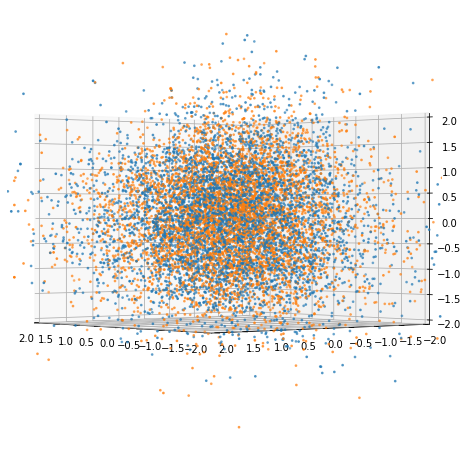

In [ ]:
x = pipe.transform(X_train[:10000])
# x = pipe['scaler1'].transform(x)
# x = pipe['decompose_non_linear'].transform(x)
# x = pipe['scaler2'].transform(x)
# x = pipe['decompose_non_linear'].transform(x)

# plt.scatter(x.T[0], x.T[1], c=[['blue', 'orange'][i] for i in y_train[:len(x)]], s=1)
# scatter_plot_3d(x, y[:len(x)])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

COLORS = ['tab:blue', 'tab:orange']

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=[COLORS[i] for i in y[:len(x)]], s=3)
ax.view_init(elev=0, azim=140)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.show()


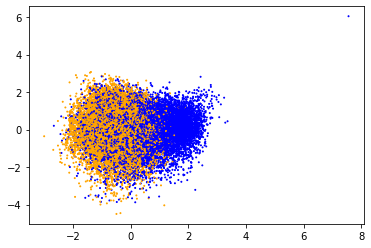

In [ ]:
plt.scatter(kernel_pca_x_train.T[0], kernel_pca_x_train.T[1], c=[['blue', 'orange'][i] for i in y_train], s=1)

## Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
train_acc = accuracy_score(pred_train, y_train)
test_acc = accuracy_score(pred_test, y_test)

"""
Train Accuracy: 0.8058658516161447
Test Accuracy: 0.7853290906045889
"""

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)



Train Accuracy: 0.7733587338804221
Test Accuracy: 0.7660693351197454


In [ ]:
"""
array([[65.935, 34.065],
       [ 8.87 , 91.13 ]])
"""

cm = confusion_matrix(y_test, pred_test)
(cm.T * 100 / cm.sum(1)).T.round(3)

array([[61.832, 38.168],
       [ 8.618, 91.382]])

In [ ]:
confusion_matrix([0], [1])

array([[0, 1],
       [0, 0]])

## Saving

In [ ]:
pipe

In [ ]:
pipe_path = os.path.join(DUMP_PATH, f"{NOTEBOOK_NAME}_pipe.pkl")
print(pipe_path)

with open(pipe_path, 'wb') as f:
    pickle.dump(pipe, f)

/content/drive/MyDrive/Colab Notebooks/dumps/quora_question_pairs/ml-04-6_pipe.pkl


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler_path = os.path.join(DUMP_PATH, f"{NOTEBOOK_NAME}_scaler.pkl")
scaler_path

'/content/drive/MyDrive/Colab Notebooks/dumps/quora_question_pairs/ml-04-2_scaler.pkl'

In [ ]:
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

## Reducing Dimensions

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Model

In [ ]:
X_train.shape, y_train.shape

((160000, 10), (160000,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier      # => Test Accuracy: 0.65 (CountVectorizer)
# from sklearn.linear_model import LogisticRegression     # => Test Accuracy: 0.68 (CountVectorizer)
# from sklearn.tree import DecisionTreeClassifier         # => Test Accuracy: 0.70 (CountVectorizer)
# from sklearn.ensemble import RandomForestClassifier     # => Test Accuracy: 0.74 (CountVectorizer)
# from sklearn.naive_bayes import GaussianNB              # => Test Accuracy: 0.64 (CountVectorizer)

"""
Steps Taken to Increase Accuracy
. count vectorizer
. added more features (len, token, fuzzywuzzy)
. advanced preprocessing of text (lemmatization)
. adding cosine similarity column
. using embeddings instead of count vectorizer
. scaling data
. using more data

KNeighborsClassifier
Train Accuracy: 0.8114166666666667
Test Accuracy: 0.7356666666666667

LogisticRegression
Train Accuracy: 0.7105
Test Accuracy: 0.7133333333333334

GaussianNB
Train Accuracy: 0.700375
Test Accuracy: 0.7081666666666667

DecisionTreeClassifier
Train Accuracy: 0.9998333333333334
Test Accuracy: 0.6938333333333333

RandomForestClassifier
Train Accuracy: 0.9998333333333334
Test Accuracy: 0.7541666666666667

"""

from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(
#     n_estimators = 200,
#     max_depth = 8,
# ) # => 0.74 => 0.7415 => 0.7838 => 0.790 => 0.7925 => 
model = KNeighborsClassifier(n_neighbors=11)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
# pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

## Saving

In [ ]:
model_path = os.path.join(DUMP_PATH, f"{NOTEBOOK_NAME}_model.pkl")
model_path

'/content/drive/MyDrive/Colab Notebooks/dumps/quora_question_pairs/ml-04-2_model.pkl'

In [ ]:
with open(model_path, 'wb') as f:
    pickle.dump(model, f)